In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('cleandata/movierevenue.csv',index_col = 0)

In [27]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,4,12,5.532577,0.846921,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,4,5,1.546673,0.607331,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,4,6,-0.572108,-1.337036,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,4,5,3.243841,0.764364,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,4,12,3.153696,0.759251,999721747


In [28]:
df['production_budget'].max()

425000000

In [29]:
df['categories_100s'] = df['production_budget']
df.loc[df['production_budget'] < 100000000,'categories_100s'] = '0 to 100'
df.loc[(df['production_budget'] < 200000000) & (df['production_budget'] >= 100000000),'categories_100s'] = '100 to 200'
df.loc[(df['production_budget'] < 300000000) & (df['production_budget'] >= 200000000),'categories_100s'] = '200 to 300'
df.loc[(df['production_budget'] < 400000000) & (df['production_budget'] >= 300000000),'categories_100s'] = '300 to 400'
df.loc[df['production_budget'] > 400000000,'categories_100s'] = '400+'

In [30]:
df['categories_100s']

0             400+
1             400+
2       300 to 400
3       300 to 400
4       300 to 400
           ...    
5777      0 to 100
5778      0 to 100
5779      0 to 100
5780      0 to 100
5781      0 to 100
Name: categories_100s, Length: 5782, dtype: object

In [31]:
df['categories_100s'].value_counts()

0 to 100      5376
100 to 200     343
200 to 300      53
300 to 400       8
400+             2
Name: categories_100s, dtype: int64

In [32]:
df.groupby('categories_100s')['markup'].agg(['sum','median','mean'])

,sum,median,mean
categories_100s,,,
0 to 100,21124.361610,0.591364,3.929383
100 to 200,675.584214,1.659514,1.969633
200 to 300,142.815276,2.544982,2.694628
300 to 400,22.692667,2.682549,2.836583
400+,7.079250,3.539625,3.539625


From the above,it suggestions that simply a bigger budget produces a bigger markup. 

Let's investigate this further

# Given that the majority of budgets lie in the 0 to 200 million range, I will investigate this category further

In [33]:
df100budget = df.loc[df['production_budget'] <= 200000000]

In [34]:
df['budgetcategories'] = df['production_budget']

In [35]:
df100budget.loc[(df100budget['production_budget'] <= 10000000), 'budgetcategories'] = '0-10'

df100budget.loc[(df100budget['production_budget'] > 10000000) & (df100budget['production_budget'] <= 20000000),
                'budgetcategories'] = '10-20'

df100budget.loc[(df100budget['production_budget'] > 20000000) & (df100budget['production_budget'] <= 30000000),
                'budgetcategories'] = '20-30'

df100budget.loc[(df100budget['production_budget'] > 30000000) & (df100budget['production_budget'] <= 40000000),
                'budgetcategories'] = '30-40'

df100budget.loc[(df100budget['production_budget'] > 40000000) & (df100budget['production_budget'] <= 50000000),
                'budgetcategories'] = '40-50'

df100budget.loc[(df100budget['production_budget'] > 50000000) & (df100budget['production_budget'] <= 60000000),
                'budgetcategories'] = '50-60'

df100budget.loc[(df100budget['production_budget'] > 60000000) & (df100budget['production_budget'] <= 70000000),
                'budgetcategories'] = '60-70'

df100budget.loc[(df100budget['production_budget'] > 70000000) & (df100budget['production_budget'] <= 80000000),
                'budgetcategories'] = '70-80'

df100budget.loc[(df100budget['production_budget'] > 80000000) & (df100budget['production_budget'] <= 90000000),
                'budgetcategories'] = '80-90'

df100budget.loc[(df100budget['production_budget'] > 90000000) & (df100budget['production_budget'] <= 100000000),
                'budgetcategories'] = '90-100'

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
df100budget.loc[(df100budget['production_budget'] > 100000000) & (df100budget['production_budget'] <= 110000000),
                'budgetcategories'] = '100-110'

df100budget.loc[(df100budget['production_budget'] > 110000000) & (df100budget['production_budget'] <= 120000000),
                'budgetcategories'] = '110-120'

df100budget.loc[(df100budget['production_budget'] > 120000000) & (df100budget['production_budget'] <= 130000000),
                'budgetcategories'] = '120-130'

df100budget.loc[(df100budget['production_budget'] > 130000000) & (df100budget['production_budget'] <= 140000000),
                'budgetcategories'] = '130-140'

df100budget.loc[(df100budget['production_budget'] > 140000000) & (df100budget['production_budget'] <= 150000000),
                'budgetcategories'] = '140-150'

df100budget.loc[(df100budget['production_budget'] > 150000000) & (df100budget['production_budget'] <= 160000000),
                'budgetcategories'] = '150-160'

df100budget.loc[(df100budget['production_budget'] > 160000000) & (df100budget['production_budget'] <= 170000000),
                'budgetcategories'] = '160-170'

df100budget.loc[(df100budget['production_budget'] > 170000000) & (df100budget['production_budget'] <= 180000000),
                'budgetcategories'] = '170-180'

df100budget.loc[(df100budget['production_budget'] > 180000000) & (df100budget['production_budget'] <= 190000000),
                'budgetcategories'] = '180-190'

df100budget.loc[(df100budget['production_budget'] > 190000000) & (df100budget['production_budget'] <= 200000000),
                'budgetcategories'] = '190-200'

In [37]:
df100budget['budgetcategories'].value_counts()

0-10       2247
10-20      1050
20-30       650
30-40       461
40-50       293
50-60       239
70-80       155
60-70       150
80-90       100
90-100       74
140-150      51
100-110      49
120-130      46
130-140      32
110-120      31
170-180      31
190-200      25
160-170      22
150-160      20
180-190      15
Name: budgetcategories, dtype: int64

In [38]:
df100budget.groupby('budgetcategories')['worldwide_gross'].agg(['sum','median','mean']).sort_values(by='budgetcategories', ascending = False)

,sum,median,mean
budgetcategories,,,
90-100,19650042564,212491499.5,2.655411e+08
80-90,23006738970,191745331.5,2.300674e+08
70-80,33070158569,158926474.0,2.133559e+08
60-70,25663862274,131969449.5,1.710924e+08
50-60,33045411858,104364680.0,1.382653e+08
40-50,31378977052,76119388.0,1.070955e+08
30-40,40980528114,62226214.0,8.889485e+07
20-30,44676574161,43568954.0,6.873319e+07
190-200,20660763649,757677748.0,8.264305e+08


In [39]:
df100budget.groupby('budgetcategories')['markup'].agg(['sum','median','mean']).sort_values(by = 'budgetcategories', ascending = False)

,sum,median,mean
budgetcategories,,,
90-100,128.484318,1.124915,1.736275
80-90,163.900674,1.243170,1.639007
70-80,275.218935,1.060000,1.775606
60-70,235.807346,1.001748,1.572049
50-60,341.495457,0.816602,1.428851
40-50,373.226967,0.615887,1.273812
30-40,656.191212,0.763481,1.423408
20-30,1046.653671,0.664965,1.610236
190-200,78.525797,2.788389,3.141032


In [41]:
df100to200 = df100budget.loc[(df100budget['production_budget'] > 100000000) & (df100budget['production_budget'] <= 200000000)]

In [42]:
df100to200['budgetcategories'].value_counts()

140-150    51
100-110    49
120-130    46
130-140    32
170-180    31
110-120    31
190-200    25
160-170    22
150-160    20
180-190    15
Name: budgetcategories, dtype: int64

In [45]:
df100to200.sort_values(by='worldwide_gross', ascending = False)[:10]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit,categories_100s,budgetcategories
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,23,2,Friday,4,12,10.041042,0.909429,2008208395,200 to 300,190-200
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,2015,5,0,Friday,4,4,6.993278,0.874895,1328722794,100 to 200,180-190
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,2,0,Friday,4,2,5.741291,0.851660,1148258224,200 to 300,190-200
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011,9,0,Friday,4,7,9.733545,0.906834,1216693157,100 to 200,120-130
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2018,2,0,Friday,4,6,6.681016,0.869809,1135772799,100 to 200,160-170
155,56,2013-11-22,Frozen,150000000,400738009,1272469910,2013,7,0,Friday,4,11,7.483133,0.882119,1122469910,100 to 200,140-150
134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,2017,3,0,Friday,4,3,6.869998,0.872935,1099199706,100 to 200,150-160
43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,2018,2,0,Friday,4,6,5.212604,0.839037,1042520711,200 to 300,190-200
47,48,2013-05-03,Iron Man 3,200000000,408992272,1215392272,2013,7,0,Friday,4,5,5.076961,0.835444,1015392272,200 to 300,190-200
135,36,2018-12-21,Aquaman,160000000,335061807,1146894640,2018,2,0,Friday,4,12,6.168092,0.860493,986894640,100 to 200,150-160


In [47]:
df100to200.groupby('budgetcategories')['markup'].agg(['sum','median','mean'])

,sum,median,mean
budgetcategories,,,
100-110,93.192664,1.682508,1.901891
110-120,58.568271,1.211550,1.889299
120-130,124.374682,2.237295,2.703797
130-140,50.037000,1.081866,1.563656
140-150,107.828476,1.848668,2.114284
150-160,47.145962,1.876675,2.357298
160-170,45.850649,1.773310,2.084120
170-180,60.126025,1.958378,1.939549
180-190,31.167646,1.797446,2.077843


In [48]:
df100to200median = pd.DataFrame(df100to200.groupby('budgetcategories')['markup'].median())

In [49]:
df100to200median.reset_index(inplace = True)

In [50]:
df100to200median

,budgetcategories,markup
0,100-110,1.682508
1,110-120,1.211550
2,120-130,2.237295
3,130-140,1.081866
4,140-150,1.848668
5,150-160,1.876675
6,160-170,1.773310
7,170-180,1.958378
8,180-190,1.797446
9,190-200,2.788389


In [51]:
dfunder100 = df100budget.loc[df100budget['production_budget'] <= 100000000]

In [52]:
dfunder100.groupby('budgetcategories')['markup'].agg(['sum','median','mean'])

,sum,median,mean
budgetcategories,,,
0-10,15453.927269,0.142509,6.877582
10-20,2500.869460,0.706194,2.381780
20-30,1046.653671,0.664965,1.610236
30-40,656.191212,0.763481,1.423408
40-50,373.226967,0.615887,1.273812
50-60,341.495457,0.816602,1.428851
60-70,235.807346,1.001748,1.572049
70-80,275.218935,1.060000,1.775606
80-90,163.900674,1.243170,1.639007


In [53]:
df100median = pd.DataFrame(dfunder100.groupby('budgetcategories')['markup'].median())

In [54]:
df100median.reset_index(inplace = True)

In [55]:
df100median

,budgetcategories,markup
0,0-10,0.142509
1,10-20,0.706194
2,20-30,0.664965
3,30-40,0.763481
4,40-50,0.615887
5,50-60,0.816602
6,60-70,1.001748
7,70-80,1.060000
8,80-90,1.243170
9,90-100,1.124915


In [56]:
import seaborn as sns

# Graphing the 0-100 Category

Text(0, 0.5, 'Average Markup per Category')

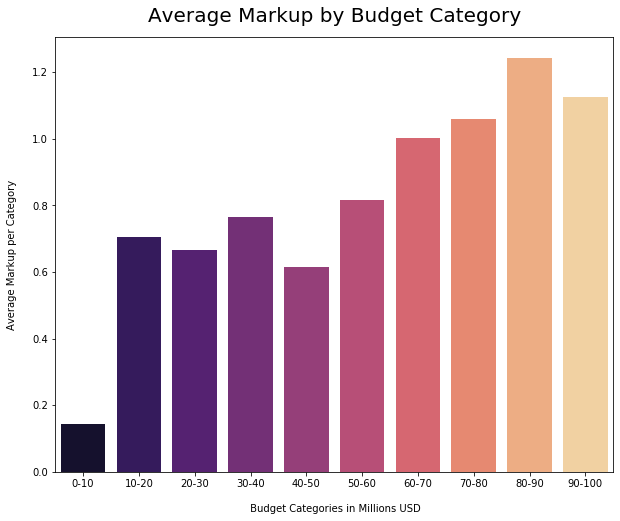

In [59]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,8))

ax = sns.barplot(x='budgetcategories', y = 'markup', data= df100median, palette= 'magma')

plt.title('Average Markup by Budget Category', pad = 15, size = 20)
plt.xlabel(' Budget Categories in Millions USD', labelpad= 15, size = 10)
plt.ylabel('Average Markup per Category', labelpad = 15, size = 10)


# Graphing the 100 to 200 Category

(0, 3)

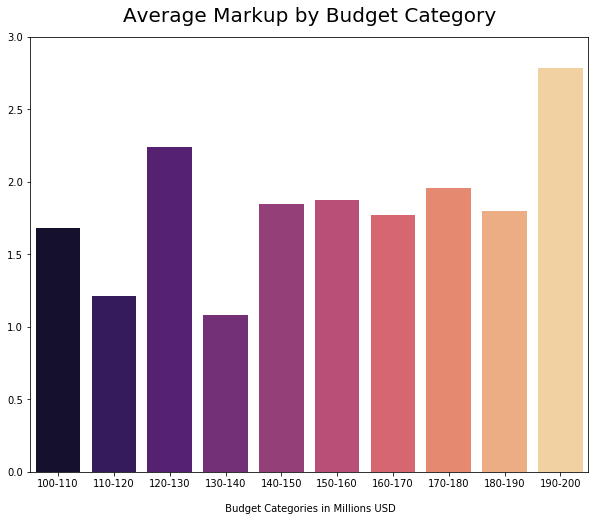

In [60]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,8))

ax = sns.barplot(x='budgetcategories', y = 'markup', data= df100to200median, palette= 'magma')

plt.title('Average Markup by Budget Category', pad = 15, size = 20)
plt.xlabel(' Budget Categories in Millions USD', labelpad= 15, size = 10)
plt.ylabel("")
plt.ylim(0,3)

In [61]:
df100budget.sort_values(by = 'budgetcategories', ascending = True)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit,categories_100s,budgetcategories
5781,82,2005-08-05,My Date With Drew,1100,181041,181041,2005,15,1,Friday,4,8,163.582727,0.993924,179941,0 to 100,0-10
4273,74,2015-08-26,No Escape,5000000,27288872,42844516,2015,5,0,Wednesday,2,8,7.568903,0.883299,37844516,0 to 100,0-10
4274,75,1980-10-03,The Elephant Man,5000000,26010864,26010864,1980,40,4,Friday,4,10,4.202173,0.807773,21010864,0 to 100,0-10
4275,76,2015-02-27,The Lazarus Effect,5000000,25801570,38359310,2015,5,0,Friday,4,2,6.671862,0.869654,33359310,0 to 100,0-10
4276,77,2001-03-16,Memento,5000000,25544867,39723096,2001,19,1,Friday,4,3,6.944619,0.874129,34723096,0 to 100,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,10,2001-05-04,The Mummy Returns,98000000,202007640,435040395,2001,19,1,Friday,4,5,3.439188,0.774734,337040395,0 to 100,90-100
410,11,2002-12-20,Gangs of New York,97000000,77730500,183124621,2002,18,1,Friday,4,12,0.887883,0.470306,86124621,0 to 100,90-100
411,12,2017-05-19,Alien: Covenant,97000000,74262031,238521247,2017,3,0,Friday,4,5,1.458982,0.593328,141521247,0 to 100,90-100
402,3,2005-02-18,Son of the Mask,100000000,17018422,59918422,2005,15,1,Friday,4,2,-0.400816,-0.668936,-40081578,100 to 200,90-100
